## Importing Necessary Libraries

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score
import plotly.express as px
from wordcloud import WordCloud
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import re
from wordcloud import WordCloud

#import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from nltk.tokenize import  word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string


## Data Loading and cleaning

In [5]:
import pandas as pd
from IPython.display import display, HTML

Hotel_Reviews = pd.read_csv('Hotel_Reviews.csv')


In [6]:
Hotel_Reviews.dropna(inplace=True)

In [7]:
Hotel_Reviews['Review_Date'] = pd.to_datetime(Hotel_Reviews.Review_Date)
Hotel_Reviews['Review_year'] =  pd.DatetimeIndex(Hotel_Reviews['Review_Date']).year

In [8]:
Hotel_Reviews.loc[Hotel_Reviews['Negative_Review']=='No Negative','Negative_Review'] = ''
Hotel_Reviews.loc[Hotel_Reviews['Positive_Review']=='No Positive','Positive_Review'] = ''

In [9]:
Hotel_Reviews["Total_Review"] = Hotel_Reviews["Negative_Review"] + Hotel_Reviews["Positive_Review"]

In [10]:
Hotel_Reviews['Total_Review']=Hotel_Reviews.Total_Review.str.replace('[^a-zA-Z]', ' ')

In [11]:
# Remove punctuation
Hotel_Reviews['Total_Review'] = Hotel_Reviews['Total_Review'].str.replace('[^\w\s]','')

In [12]:
Hotel_Reviews['Total_Review']=Hotel_Reviews['Total_Review'].str.lower()

In [13]:
Hotel_Reviews['Total_Review'] = Hotel_Reviews['Total_Review'].astype(str)

In [14]:
Hotel_Reviews.describe()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Review_year
count,54207.000000,54207,54207.000000,54207.000000,54207.000000,54207.000000,54207.000000,54207.000000,54207.000000,54207.000000,54207.000000
mean,524.384378,2016-08-06 08:10:55.088825856,8.437995,18.315199,2333.781117,17.592101,6.529028,8.444085,51.039344,0.346697,2016.111738
min,6.000000,2015-08-04 00:00:00,7.100000,0.000000,49.000000,0.000000,1.000000,2.500000,48.817808,-0.275622,2015.000000
25%,189.000000,2016-02-17 00:00:00,8.100000,2.000000,1059.000000,6.000000,1.000000,7.500000,51.492548,-0.178061,2016.000000
50%,404.000000,2016-08-04 00:00:00,8.400000,9.000000,2130.000000,11.000000,3.000000,8.800000,51.510654,-0.128349,2016.000000
75%,724.000000,2017-01-30 00:00:00,8.800000,23.000000,3150.000000,22.000000,7.000000,9.600000,51.516384,-0.007271,2017.000000
max,1322.000000,2017-08-03 00:00:00,9.600000,397.000000,6539.000000,383.000000,315.000000,10.000000,52.360576,4.915968,2017.000000
std,402.065318,NaN,0.512075,29.038457,1703.092273,21.044493,10.229435,1.605746,1.023820,1.029330,0.679231


In [15]:
Hotel_Reviews.nunique()

Hotel_Address                                   155
Additional_Number_of_Scoring                    125
Review_Date                                     731
Average_Score                                    25
Hotel_Name                                      155
Reviewer_Nationality                            173
Negative_Review                               35897
Review_Total_Negative_Word_Counts               308
Total_Number_of_Reviews                         147
Positive_Review                               45540
Review_Total_Positive_Word_Counts               232
Total_Number_of_Reviews_Reviewer_Has_Given      130
Reviewer_Score                                   37
Tags                                           9935
days_since_review                               731
lat                                             155
lng                                             155
Review_year                                       3
Total_Review                                  53111
dtype: int64

In [16]:
# Split the address and extract the country
Hotel_Reviews['hotel_country'] = Hotel_Reviews.Hotel_Address.apply(lambda x: x.split(' ')[-1])

In [17]:
Hotel_Reviews

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_year,Total_Review,hotel_country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,2017,i am so angry that i made this post available...,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,2017,no real complaints the hotel was great great ...,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,2017,rooms are nice but for elderly a bit difficul...,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,2017,my room was dirty and i was afraid to walk ba...,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,2017,you when i booked with your company on line y...,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54202,15 Cromwell Place Kensington and Chelsea Londo...,174,2016-12-16,8.6,The Pelham Starhotels Collezione,Spain,Everything was perfect,4.0,833.0,Bed super comfy Lovely room,6.0,3.0,9.2,"[' Business trip ', ' Couple ', ' Executive Do...",230 day,51.494394,-0.175017,2016,everything was perfect bed super comfy lovely...,Kingdom
54203,15 Cromwell Place Kensington and Chelsea Londo...,174,2016-12-14,8.6,The Pelham Starhotels Collezione,Australia,Could do with tea coffee facilities in the room,11.0,833.0,Excellent location beautiful decor comfy beds...,10.0,3.0,8.8,"[' Leisure trip ', ' Family with young childre...",232 day,51.494394,-0.175017,2016,could do with tea coffee facilities in the ro...,Kingdom
54204,15 Cromwell Place Kensington and Chelsea Londo...,174,2016-12-13,8.6,The Pelham Starhotels Collezione,Austria,Baustellenger st for dem Fenster,7.0,833.0,Sch nes Charming London Style Boutique Hotel,8.0,7.0,9.2,"[' Leisure trip ', ' Family with young childre...",233 day,51.494394,-0.175017,2016,baustellenger st for dem fenster sch nes cha...,Kingdom
54205,15 Cromwell Place Kensington and Chelsea Londo...,174,2016-12-08,8.6,The Pelham Starhotels Collezione,United Arab Emirates,Reception is too small for a five stars hotel,10.0,833.0,Room was clean and nice,6.0,1.0,7.9,"[' Business trip ', ' Solo traveler ', ' Delux...",238 day,51.494394,-0.175017,2016,reception is too small for a five stars hotel...,Kingdom


## Exploratory Data Analysis

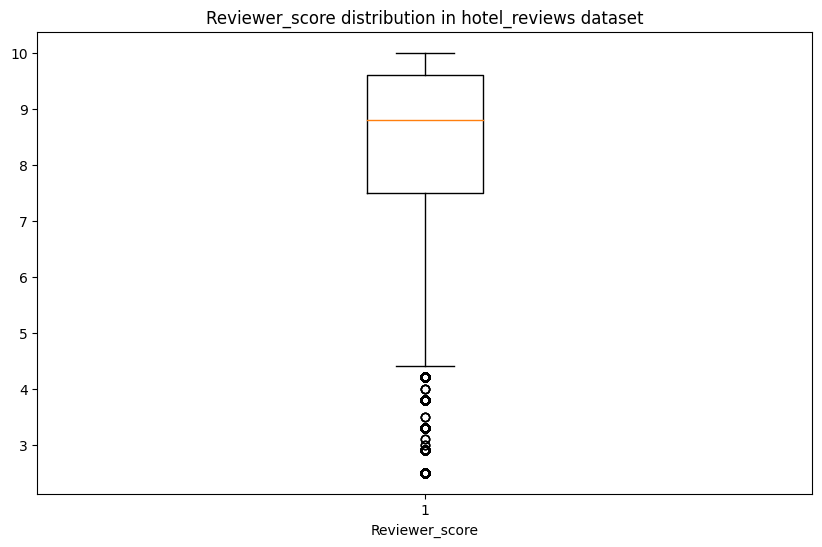

In [18]:
plt.figure(figsize=(10, 6))
plt.boxplot(Hotel_Reviews.Reviewer_Score)
plt.xlabel("Reviewer_score")
plt.title("Reviewer_score distribution in hotel_reviews dataset")
plt.show()

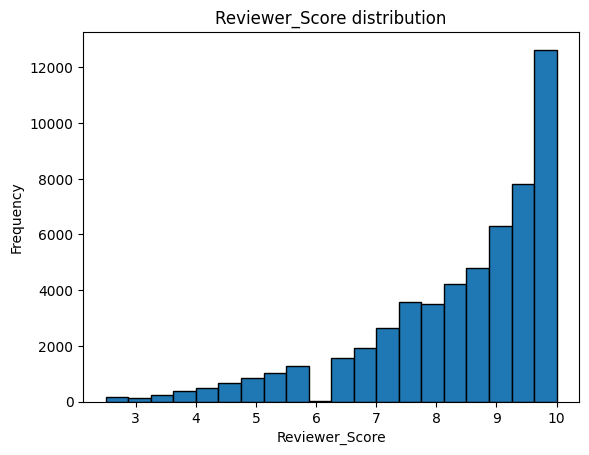

In [19]:
plt.hist(Hotel_Reviews['Reviewer_Score'],bins=20,edgecolor=
        "black")
plt.xlabel("Reviewer_Score")
plt.ylabel("Frequency")
plt.title("Reviewer_Score distribution")
plt.show()

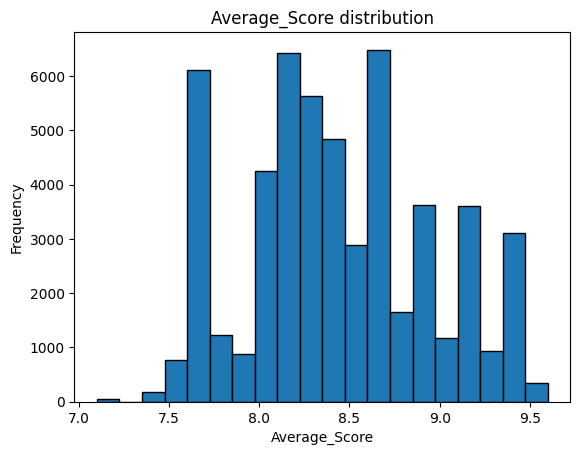

In [20]:
plt.hist(Hotel_Reviews['Average_Score'],bins=20,edgecolor=
        "black")
plt.xlabel("Average_Score")
plt.ylabel("Frequency")
plt.title("Average_Score distribution")
plt.show()

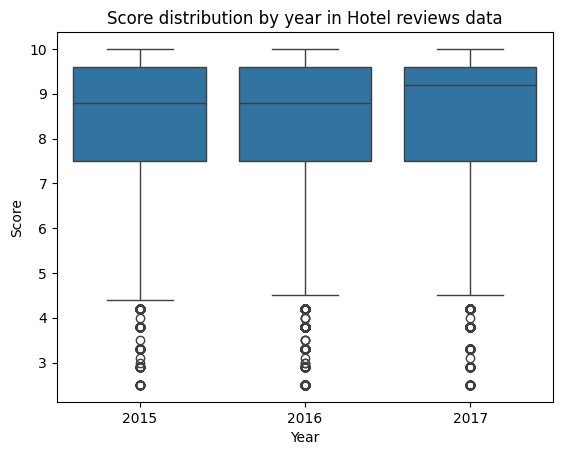

In [21]:
sns.boxplot(x='Review_year',y='Reviewer_Score',data=Hotel_Reviews)
plt.xlabel("Year")
plt.ylabel("Score")
plt.title("Score distribution by year in Hotel reviews data")
plt.show()

In [22]:
review_df = Hotel_Reviews[['Hotel_Name','hotel_country','Total_Review','Reviewer_Score','Average_Score','Reviewer_Nationality',
                           'Total_Number_of_Reviews_Reviewer_Has_Given','Tags']]
review_df.head()

,Hotel_Name,hotel_country,Total_Review,Reviewer_Score,Average_Score,Reviewer_Nationality,Total_Number_of_Reviews_Reviewer_Has_Given,Tags
0,Hotel Arena,Netherlands,i am so angry that i made this post available...,2.9,7.7,Russia,7.0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,Hotel Arena,Netherlands,no real complaints the hotel was great great ...,7.5,7.7,Ireland,7.0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,Hotel Arena,Netherlands,rooms are nice but for elderly a bit difficul...,7.1,7.7,Australia,9.0,"[' Leisure trip ', ' Family with young childre..."
3,Hotel Arena,Netherlands,my room was dirty and i was afraid to walk ba...,3.8,7.7,United Kingdom,1.0,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,Hotel Arena,Netherlands,you when i booked with your company on line y...,6.7,7.7,New Zealand,3.0,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


## Feature Enginerring

We will first be performing sentiment analysis on Total_reviews which is combination of positive and negative reviews and collect sentiment scores from Vader model.
Then further using these as our features and Reviewer_score as Target variable.

## Vader Sentiment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.
This don't consider relationship between words so this will not be a very optimized approach.

In [23]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [24]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(review_df.Total_Review.reset_index().iterrows(), total=len(review_df)):
    text = row['Total_Review']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/54207 [00:00<?, ?it/s]

In [25]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index()
vaders = vaders.merge(review_df.reset_index(), how='left')

In [26]:
vaders.head()

,index,neg,neu,pos,compound,Hotel_Name,hotel_country,Total_Review,Reviewer_Score,Average_Score,Reviewer_Nationality,Total_Number_of_Reviews_Reviewer_Has_Given,Tags
0,0,0.083,0.859,0.058,-0.8589,Hotel Arena,Netherlands,i am so angry that i made this post available...,2.9,7.7,Russia,7.0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,1,0.058,0.757,0.186,0.9494,Hotel Arena,Netherlands,no real complaints the hotel was great great ...,7.5,7.7,Ireland,7.0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,2,0.111,0.671,0.218,0.8402,Hotel Arena,Netherlands,rooms are nice but for elderly a bit difficul...,7.1,7.7,Australia,9.0,"[' Leisure trip ', ' Family with young childre..."
3,3,0.099,0.754,0.147,0.9355,Hotel Arena,Netherlands,my room was dirty and i was afraid to walk ba...,3.8,7.7,United Kingdom,1.0,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,4,0.058,0.861,0.081,0.5263,Hotel Arena,Netherlands,you when i booked with your company on line y...,6.7,7.7,New Zealand,3.0,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


## Model fititng

We have performed sentiment analysis, now we will use Decision Tree Regressor, Random Forest Regressor and Adaboost Model to predict Reviewer Score.

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
X = vaders[['neg','neu','pos','compound']]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    vaders['Reviewer_Score'],
    test_size=0.25,
    random_state=42
  )

In [30]:
# Fit a Random Forest regressor

rf_model = RandomForestRegressor(random_state=5220,n_estimators = 100)
rf_model.fit(X_train,y_train)

# Make predictions with the Random Forest regressor
rf_pred = rf_model.predict(X_test)

# Calculate metrics for the Random Forest regressor
rfmse = mean_squared_error(y_test, rf_pred)
print("Random Forest MSE:", rfmse)

Random Forest MSE: 2.01356429257642


In [31]:
# Fit an AdaBoost regressor
ab_model = AdaBoostRegressor(n_estimators=100,random_state = 5220)
ab_model.fit(X_train,y_train)

# Make predictions with the AdaBoost regressor
adaboost_pred = ab_model.predict(X_test)

# Calculate metrics for the AdaBoost regressor

abmse = mean_squared_error(y_test, adaboost_pred)
print("Adaboost MSE:", abmse)

Adaboost MSE: 2.007276531624792


In [32]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

# Make predictions with the Decision Tree regressor
dt_pred = dt_model.predict(X_test)

# Calculate metrics for the Decision Tree regressor
dtmse = mean_squared_error(y_test, dt_pred)
print("Decision Tree MSE:",dtmse)

Decision Tree MSE: 3.0956333634529267


In [33]:
print("Decision Tree MSE:", dtmse)
print("Random Forest MSE:", rfmse)
print("Adaboost MSE:", abmse)

Decision Tree MSE: 3.0956333634529267
Random Forest MSE: 2.01356429257642
Adaboost MSE: 2.007276531624792


[0.1533019  0.15622199 0.36237508 0.32810103]


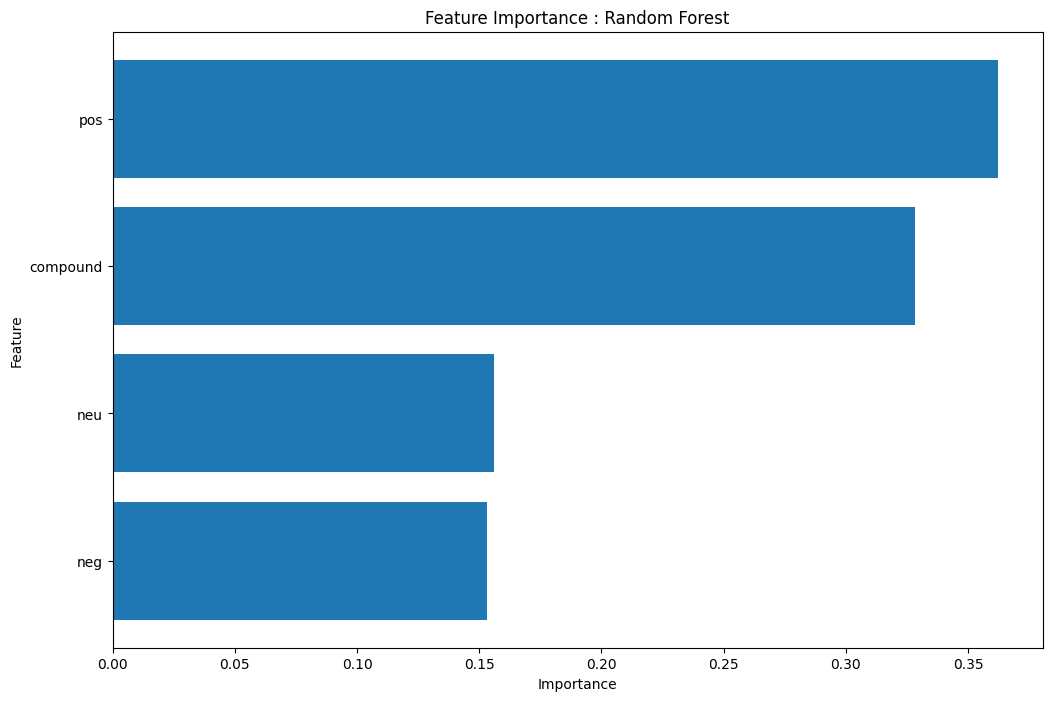

In [34]:
# Plot the variable importance for Random Forest, this will show which variables are playing imp role in RF


import numpy as np

importances = rf_model.feature_importances_
print(importances)
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title("Feature Importance : Random Forest")
plt.barh(range(len(importances)),importances[indices],align='center')
plt.yticks(range(len(importances)),[X_train.columns[i] for i in indices])

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Model Analysis

We can see Random Forest is performing best with MSE of 2.0 and Decision Tree with 2.85.
Also, positive score captured from Vader sentiment analysis is most import fetaure to predict Reviewer_score this can be because most of the reviews are skewed having more positive score.

## Model testing using example

In [35]:
example1 = 'Easy access to San Diego main areas. Nice to have good coffee in lobby & brown bag breakfast. Nice staff'

In [36]:
example1_scores= sia.polarity_scores(example1)

In [37]:
example1_scores = pd.DataFrame(example1_scores, index=[0])

In [38]:
rf_pred = rf_model.predict(example1_scores)

In [39]:
print("\nReviewer_score for example 1 using random forest regressor: ", rf_pred)


Reviewer_score for example 1 using random forest regressor:  [9.3765]


In [40]:
example2 ='my room was dirty and i was afraid to walk,and bathroom tile floor could have been cleaner. Spots/general soiling on the chairs and the tile was dirty, along with hair and dirt in the corners.'

In [41]:
example2_scores = pd.DataFrame(sia.polarity_scores(example2), index=[0])

In [42]:
rf_pred = rf_model.predict(example2_scores)

In [43]:
print("Reviewer_score for example 2 using random forest regressor:", rf_pred)

Reviewer_score for example 2 using random forest regressor: [6.296]


In [44]:
print("\nReviewer_score for example 1 using random forest regressor: ", rf_pred)


Reviewer_score for example 1 using random forest regressor:  [6.296]


### Data Preprocessing

In [45]:
import pandas as pd

df = pd.read_csv('Hotel_Reviews.csv')
df.columns = df.columns.str.lower()

df

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99263,20 Pembridge Gardens Kensington and Chelsea Lo...,43,3/6/2016,7.8,The Abbey Court Notting Hill,United Kingdom,Doors very noisy when shutting due to heavine...,34,322,Breakfast was Fresh With A Nice Mix Of Foods ...,12.0,9.0,8.3,"[' Leisure trip ', ' Couple ', ' Double Room '...",515 day,51.510140,-0.196895
99264,20 Pembridge Gardens Kensington and Chelsea Lo...,43,12/9/2015,7.8,The Abbey Court Notting Hill,United Kingdom,Holding the shower in the bath,7,322,Room abit dated but nice enough Bathroom smal...,30.0,1.0,7.5,"[' Leisure trip ', ' Couple ', ' Double Room '...",603 day,51.510140,-0.196895
99265,20 Pembridge Gardens Kensington and Chelsea Lo...,43,12/8/2015,7.8,The Abbey Court Notting Hill,United Kingdom,No Negative,0,322,The location near the tube the friendly and h...,29.0,12.0,9.2,"[' Leisure trip ', ' Couple ', ' Double Room '...",604 day,51.510140,-0.196895
99266,20 Pembridge Gardens Kensington and Chelsea Lo...,43,11/7/2015,7.8,The Abbey Court Notting Hill,United Kingdom,3 flights of stairs but that s unavoidable on...,20,322,Very civilised decor and the bathroom was ver...,21.0,1.0,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",635 day,51.510140,-0.196895


In [46]:
df.loc[df['positive_review'] == 'No Positive', 'positive_review'] = ''
df.loc[df['negative_review'] == 'No Negative', 'negative_review'] = ''

df['positive_review'].describe()

count     99268
unique    81832
top            
freq       7142
Name: positive_review, dtype: object

In [47]:
# df = df.sample(frac=0.001, random_state=22).reset_index(drop=True).copy()

# df

In [48]:
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_string_and_keep_nouns(input_string):
    doc = nlp(input_string)
    lemmatized_words = [token.lemma_ for token in doc if token.pos_ == 'NOUN']
    return " ".join(lemmatized_words)

'Done'

'Done'

In [49]:
import pandas as pd

# Ensure the 'positive_review' column is of type string
df['positive_review'] = df['positive_review'].astype(str)

# Apply the function after ensuring all data is of type string
df['positive_review_lem'] = df['positive_review'].apply(lemmatize_string_and_keep_nouns)

In [50]:
df['negative_review'] = df['negative_review'].astype(str)

# Apply the function 'lemmatize_string_and_keep_nouns'
df['negative_review_lem'] = df['negative_review'].apply(lemmatize_string_and_keep_nouns)

In [51]:
df.to_csv('hotel_reviews_preprocessed.csv', index=False)

### EDA and Model

In [52]:
import pandas as pd

df = pd.read_csv('Hotel_Reviews.csv')
df.loc[df['Positive_Review'] == 'No Positive', 'Positive_Review'] = ''
df.loc[df['Negative_Review'] == 'No Negative', 'Negative_Review'] = ''

df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

positive_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

positive_words = positive_vectorizer.fit_transform(df['Positive_Review'])

positive_words

<515738x926 sparse matrix of type '<class 'numpy.int64'>'
	with 3764521 stored elements in Compressed Sparse Row format>

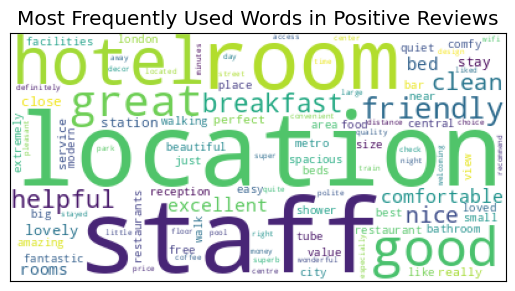

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.size'] = 12

positive_word_freq_dict = dict(zip(positive_vectorizer.get_feature_names_out(), np.asarray(positive_words.mean(axis=0))[0]))

positive_wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(positive_word_freq_dict)

plt.figure()

plt.imshow(positive_wordcloud)
plt.xticks([])
plt.yticks([])

plt.title('Most Frequently Used Words in Positive Reviews')

plt.show()

In [55]:
negative_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

negative_words = negative_vectorizer.fit_transform(df['Negative_Review'])

negative_words

<515738x1126 sparse matrix of type '<class 'numpy.int64'>'
	with 2954210 stored elements in Compressed Sparse Row format>

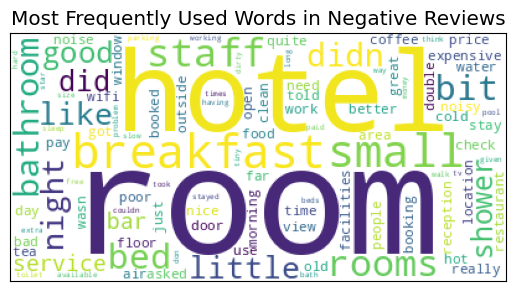

In [56]:
negative_word_freq_dict = dict(zip(negative_vectorizer.get_feature_names_out(), np.asarray(negative_words.mean(axis=0))[0]))

wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(negative_word_freq_dict)

plt.figure()

plt.imshow(wordcloud)
plt.xticks([])
plt.yticks([])

plt.title('Most Frequently Used Words in Negative Reviews')

plt.show()

In [57]:
import pandas as pd

df = pd.read_csv('hotel_reviews_preprocessed.csv')
df.loc[df['positive_review_lem'].isna(), 'positive_review_lem'] = ''
df.loc[df['negative_review_lem'].isna(), 'negative_review_lem'] = ''

df

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,positive_review_lem,negative_review_lem
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,park hotel,post site trip one mistake place booking com n...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,NaN,0,1403,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,complaint hotel location surrounding room amen...,
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,staff hotel breakfast range,room bit room story step level room tea coffee...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,location surrounding bar restaurant area build...,room floor week furniture picture door dog sho...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,location setting,company line picture room room staff suite adv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99263,20 Pembridge Gardens Kensington and Chelsea Lo...,43,3/6/2016,7.8,The Abbey Court Notting Hill,United Kingdom,Doors very noisy when shutting due to heavine...,34,322,Breakfast was Fresh With A Nice Mix Of Foods ...,12.0,9.0,8.3,"[' Leisure trip ', ' Couple ', ' Double Room '...",515 day,51.510140,-0.196895,mix,door heaviness telephone style handpiece head ...
99264,20 Pembridge Gardens Kensington and Chelsea Lo...,43,12/9/2015,7.8,The Abbey Court Notting Hill,United Kingdom,Holding the shower in the bath,7,322,Room abit dated but nice enough Bathroom smal...,30.0,1.0,7.5,"[' Leisure trip ', ' Couple ', ' Double Room '...",603 day,51.510140,-0.196895,abit shower bath staff location shop tube,shower bath
99265,20 Pembridge Gardens Kensington and Chelsea Lo...,43,12/8/2015,7.8,The Abbey Court Notting Hill,United Kingdom,NaN,0,322,The location near the tube the friendly and h...,29.0,12.0,9.2,"[' Leisure trip ', ' Couple ', ' Double Room '...",604 day,51.510140,-0.196895,location tube staff room break,
99266,20 Pembridge Gardens Kensington and Chelsea Lo...,43,11/7/2015,7.8,The Abbey Court Notting Hill,United Kingdom,3 flights of stairs but that s unavoidable on...,20,322,Very civilised decor and the bathroom was ver...,21.0,1.0,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",635 day,51.510140,-0.196895,decor bathroom breakfast room breakfast,flight stair side bit exercise


In [58]:
len(df['hotel_address'].unique())

280

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

positive_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

positive_words = positive_vectorizer.fit_transform(df['positive_review_lem'])

positive_words

<99268x373 sparse matrix of type '<class 'numpy.int64'>'
	with 306830 stored elements in Compressed Sparse Row format>

In [60]:
import nltk
nltk.download('words')

from nltk.corpus import words

english_words = set(words.words())

valid_word = [True if word in english_words else False for word in positive_vectorizer.get_feature_names_out()]

sum(valid_word)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


348

In [61]:
positive_words = positive_words[:, valid_word]

positive_words

<99268x348 sparse matrix of type '<class 'numpy.int64'>'
	with 298507 stored elements in Compressed Sparse Row format>

In [62]:
positive_words_labels = positive_vectorizer.get_feature_names_out()[valid_word]

positive_words_labels

array(['access', 'accommodation', 'addition', 'afternoon', 'air',
       'airport', 'ambience', 'amenity', 'anniversary', 'architecture',
       'area', 'arena', 'arrival', 'atmosphere', 'attention', 'attitude',
       'attraction', 'bag', 'balcony', 'bar', 'base', 'bath', 'bathroom',
       'bed', 'bedroom', 'beer', 'birthday', 'biscuit', 'bit', 'block',
       'board', 'bonus', 'book', 'booking', 'bottle', 'brand', 'break',
       'breakfast', 'buffet', 'building', 'bus', 'business', 'cake',
       'car', 'card', 'care', 'case', 'ceiling', 'center', 'chain',
       'champagne', 'change', 'character', 'charge', 'charm', 'check',
       'child', 'chocolate', 'choice', 'city', 'class', 'cleaning',
       'cleanliness', 'club', 'cocktail', 'coffee', 'comfort',
       'complaint', 'concert', 'concierge', 'condition', 'connection',
       'control', 'convenience', 'cor', 'corner', 'cost', 'couple',
       'course', 'courtyard', 'curtain', 'customer', 'daughter', 'day',
       'deal', 'deco

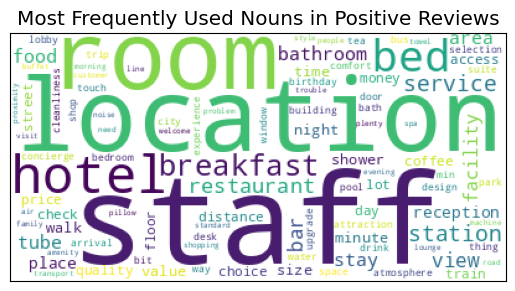

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.size'] = 12

positive_word_freq_dict = dict(zip(positive_words_labels, np.asarray(positive_words.mean(axis=0))[0]))

positive_wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(positive_word_freq_dict)

plt.figure()

plt.imshow(positive_wordcloud)
plt.xticks([])
plt.yticks([])

plt.title('Most Frequently Used Nouns in Positive Reviews')

plt.show()

In [64]:
negative_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

negative_words = negative_vectorizer.fit_transform(df['negative_review_lem'])

negative_words

<99268x438 sparse matrix of type '<class 'numpy.int64'>'
	with 262983 stored elements in Compressed Sparse Row format>

In [65]:
valid_word = [True if word in english_words else False for word in negative_vectorizer.get_feature_names_out()]

sum(valid_word)

411

In [66]:
negative_words = negative_words[:, valid_word]

negative_words

<99268x411 sparse matrix of type '<class 'numpy.int64'>'
	with 252030 stored elements in Compressed Sparse Row format>

In [67]:
negative_words_labels = negative_vectorizer.get_feature_names_out()[valid_word]

negative_words_labels

array(['access', 'accommodation', 'account', 'addition', 'adult',
       'advance', 'afternoon', 'age', 'air', 'airport', 'alarm',
       'amenity', 'answer', 'apology', 'area', 'arrival', 'atmosphere',
       'attention', 'attitude', 'attraction', 'baby', 'bacon', 'bag',
       'balcony', 'bank', 'bar', 'basement', 'basin', 'bath', 'bathroom',
       'bathtub', 'bed', 'bedroom', 'bedside', 'beer', 'birthday',
       'biscuit', 'bit', 'blind', 'board', 'body', 'book', 'booking',
       'bottle', 'box', 'bread', 'breakfast', 'buffet', 'building', 'bus',
       'business', 'car', 'card', 'care', 'carpet', 'case', 'cash',
       'ceiling', 'center', 'chair', 'change', 'channel', 'charge',
       'check', 'cheese', 'child', 'choice', 'cigarette', 'city',
       'cleaner', 'cleaning', 'cleanliness', 'client', 'closet', 'clothe',
       'club', 'cocktail', 'coffee', 'comfort', 'comment',
       'communication', 'company', 'compensation', 'complaint',
       'concierge', 'condition', 'conditi

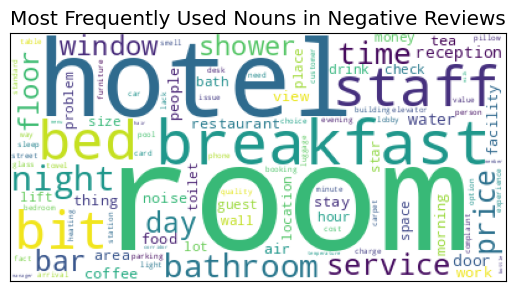

In [68]:
negative_word_freq_dict = dict(zip(negative_words_labels, np.asarray(negative_words.mean(axis=0))[0]))

wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(negative_word_freq_dict)

plt.figure()

plt.imshow(wordcloud)
plt.xticks([])
plt.yticks([])

plt.title('Most Frequently Used Nouns in Negative Reviews')

plt.show()

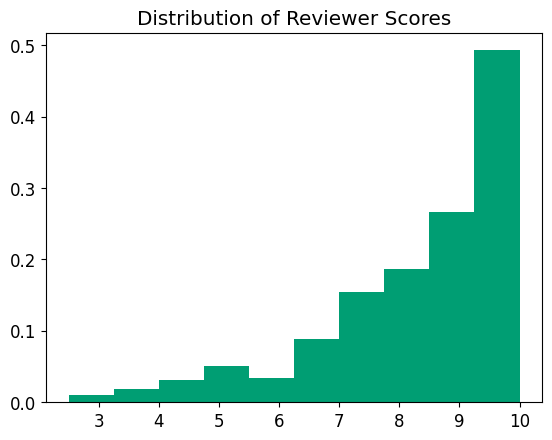

In [69]:
plt.hist(df['reviewer_score'], color='#009E73', density=True)

plt.title('Distribution of Reviewer Scores')

plt.show()

In [70]:
# df['reviewer_score'] = (df['reviewer_score'] - df['reviewer_score'].min())/(df['reviewer_score'].max() - df['reviewer_score'].min())*4 + 1

# df['reviewer_score'].describe()

In [71]:
# plt.hist(df['reviewer_score'], color='#009E73', density=True)

# plt.title('Distribution of Review Scores')

# plt.show()

In [72]:
X = np.hstack((positive_words.toarray().astype('uint8'), negative_words.toarray().astype('uint8')))
y = df['reviewer_score'].to_numpy()

X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [73]:
import numpy as np

# First, let's create a mask for rows where 'y' is not NaN
non_nan_mask = ~np.isnan(y)

# Now, apply this mask to both 'X' and 'y' to remove any rows with NaN in 'y'
X_non_nan = X[non_nan_mask]
y_non_nan = y[non_nan_mask]

In [ ]:
y_non_nan

In [87]:
X = X[:-1,:]


In [88]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=3, shuffle=True, random_state=22)

def get_cv_mse(alpha, l1_ratio, kf=kf, X=X, y=y_non_nan):
    print(X.shape)
    print(y.shape)
    if l1_ratio == 0:
        mod = Ridge(alpha=alpha)
    elif l1_ratio == 1:
        mod = Lasso(alpha=alpha)
    else:
        mod = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    predictions = np.array([])
    actuals = np.array([])
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train = X[train_index]
        y_train = y[train_index]

        X_test = X[test_index]
        y_test = y[test_index]

        mod.fit(X_train, y_train)

        predictions = np.concatenate((predictions, mod.predict(X_test)))
        actuals = np.concatenate((actuals, np.array(y_test)))

    return mod, mean_squared_error(actuals, predictions)

best_mod = None
best_mse = None
alphas = []
l1_ratios = []
mses = []
for alpha in [10**(v) for v in range(-3, 4)]:
    for l1_ratio in [0, 0.25, 0.5, 0.75, 1]:
        mod, mse = get_cv_mse(alpha, l1_ratio)

        # for plot
        alphas.append(alpha)
        l1_ratios.append(l1_ratio)
        mses.append(mse)

        print(f'mod: {mod}, mse: {mse}')

        if not best_mse:
            best_mod = mod
            best_mse = mse
        elif mse < best_mse:
            best_mod = mod
            best_mse = mse

best_mod, best_mse

(99267, 759)
(99267,)
mod: Ridge(alpha=0.001), mse: 1.7685195495620252
(99267, 759)
(99267,)
mod: ElasticNet(alpha=0.001, l1_ratio=0.25), mse: 1.7671900989618858
(99267, 759)
(99267,)
mod: ElasticNet(alpha=0.001), mse: 1.7764333570949018
(99267, 759)
(99267,)
mod: ElasticNet(alpha=0.001, l1_ratio=0.75), mse: 1.785251888127801
(99267, 759)
(99267,)
mod: Lasso(alpha=0.001), mse: 1.7935674024209902
(99267, 759)
(99267,)
mod: Ridge(alpha=0.01), mse: 1.7685165597862391
(99267, 759)
(99267,)
mod: ElasticNet(alpha=0.01, l1_ratio=0.25), mse: 1.8631743171366768
(99267, 759)
(99267,)
mod: ElasticNet(alpha=0.01), mse: 1.9039293314296506
(99267, 759)
(99267,)
mod: ElasticNet(alpha=0.01, l1_ratio=0.75), mse: 1.934735988085881
(99267, 759)
(99267,)
mod: Lasso(alpha=0.01), mse: 1.9599965449093435
(99267, 759)
(99267,)
mod: Ridge(alpha=0.1), mse: 1.7684867335297043
(99267, 759)
(99267,)
mod: ElasticNet(alpha=0.1, l1_ratio=0.25), mse: 2.165172405798916
(99267, 759)
(99267,)
mod: ElasticNet(alpha=0.1), 

(Ridge(alpha=100), 1.763764974136562)

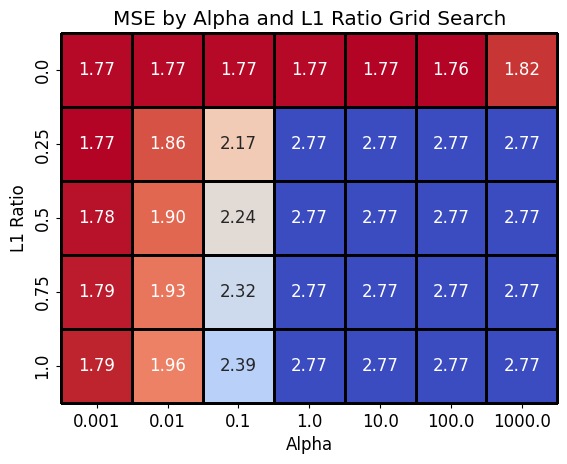

In [89]:
import seaborn as sns

df_gridsearch = pd.DataFrame(
    {
        'Alpha': alphas,
        'L1 Ratio': l1_ratios,
        'MSE': mses
    }
).pivot(index='L1 Ratio', columns='Alpha', values='MSE')

sns.heatmap(df_gridsearch, annot=True, fmt='.2f', cmap='coolwarm_r', cbar=False,
            linewidths=1, linecolor='black', clip_on=False)

plt.title('MSE by Alpha and L1 Ratio Grid Search')

plt.show()

In [92]:
mod = best_mod

mod.fit(X, y_non_nan)

mean_squared_error(y_non_nan, mod.predict(X))

1.7386520106769265

In [93]:
df_feature_values = pd.DataFrame(
    {
        'Word': np.concatenate((
            [s for s in positive_words_labels],
            [s for s in negative_words_labels]
        )),
        'Review Type': np.concatenate((
            ['Positive' for s in positive_words_labels],
            ['Negative' for s in negative_words_labels]
        )),
        'Frequency': np.concatenate((
            np.asarray(positive_words.sum(axis=0))[0], np.asarray(negative_words.sum(axis=0))[0]
        )),
        'Value': mod.coef_
    }
)

df_feature_values['Frequency'] = df_feature_values['Frequency']/df.shape[0]

df_feature_values.sort_values(by=['Value'], ascending=False, inplace=True, ignore_index=True)

df_feature_values.head(25)

,Word,Review Type,Frequency,Value
0,staff,Positive,0.301507,0.531680
1,superb,Positive,0.003193,0.365901
2,atmosphere,Positive,0.010839,0.346242
3,value,Positive,0.019896,0.339498
4,hotel,Positive,0.175102,0.338230
5,arena,Positive,0.001521,0.328485
6,service,Positive,0.048455,0.327737
7,pleasure,Positive,0.001320,0.327211
8,comfort,Positive,0.007807,0.324055
9,room,Positive,0.278136,0.323697


In [94]:
df_feature_values.tail(25).iloc[::-1]

,Word,Review Type,Frequency,Value
758,money,Negative,0.013841,-0.783965
757,staff,Negative,0.056876,-0.743350
756,furniture,Negative,0.006961,-0.707320
755,room,Negative,0.268173,-0.705042
754,attitude,Negative,0.002468,-0.661668
753,bed,Negative,0.055214,-0.623883
752,carpet,Negative,0.007938,-0.621122
751,refurbishment,Negative,0.003153,-0.611028
750,star,Negative,0.011655,-0.588308
749,condition,Negative,0.002649,-0.573252


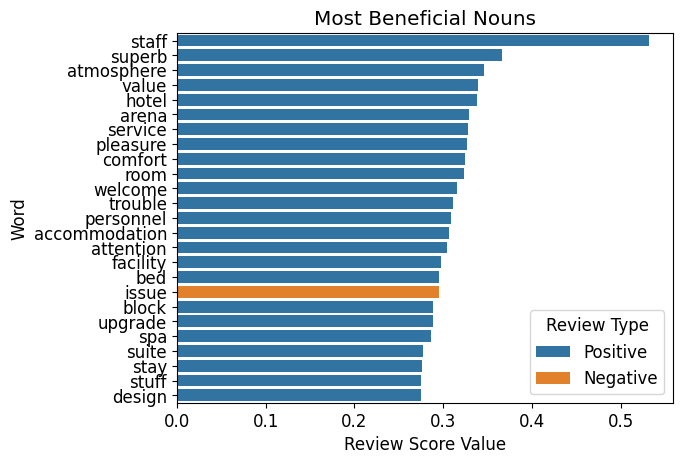

In [95]:
ax = sns.barplot(data=df_feature_values.head(25), x='Value', y='Word', hue='Review Type', dodge=False)
sns.move_legend(ax, 'lower right')

plt.title('Most Beneficial Nouns')
plt.xlabel('Review Score Value')

plt.show()

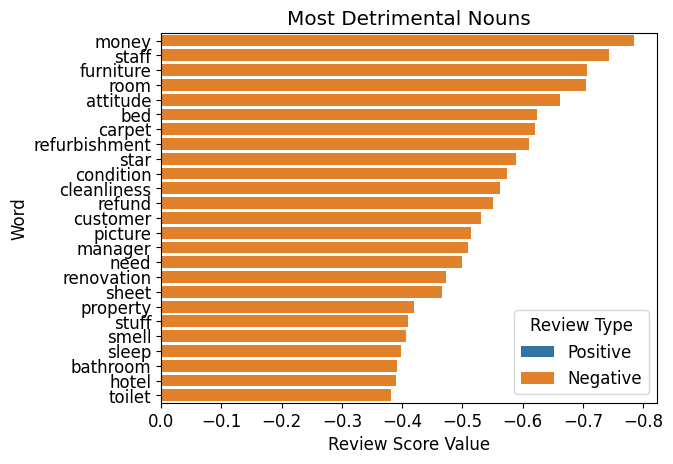

In [96]:
df_feature_values_tail = df_feature_values.tail(25)

# make positive show in legend
df_feature_values_tail = pd.concat(
    [df_feature_values_tail, pd.DataFrame({'Word': [df_feature_values['Word'].iloc[-1]], 'Review Type': ['Positive'], 'Value': [0.0]})]
)

sns.barplot(data=df_feature_values_tail.iloc[::-1], x='Value', y='Word', hue='Review Type', dodge=False)
plt.gca().invert_xaxis()

plt.title('Most Detrimental Nouns')
plt.xlabel('Review Score Value')

plt.show()

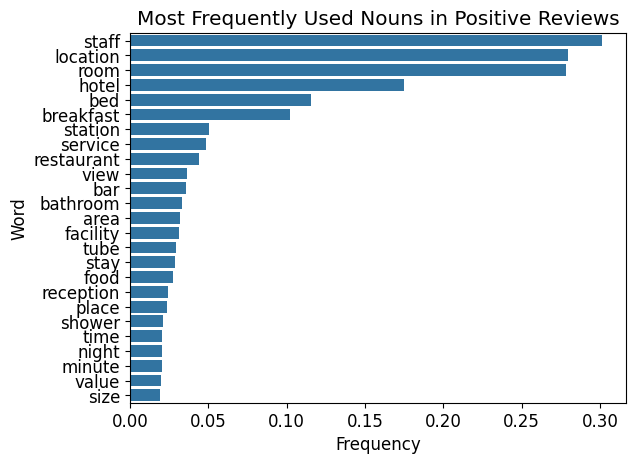

In [97]:
df_positive = df_feature_values.loc[df_feature_values['Review Type'] == 'Positive', :].sort_values(by=['Frequency'], ascending=False)

sns.barplot(data=df_positive.head(25), x='Frequency', y='Word', color='#1f77b4')

plt.title('Most Frequently Used Nouns in Positive Reviews')

plt.show()

In [98]:
df_positive.head(25)

,Word,Review Type,Frequency,Value
0,staff,Positive,0.301507,0.531680
264,location,Positive,0.279657,0.050306
9,room,Positive,0.278136,0.323697
4,hotel,Positive,0.175102,0.338230
16,bed,Positive,0.115888,0.295464
86,breakfast,Positive,0.102500,0.154716
390,station,Positive,0.050167,-0.001937
6,service,Positive,0.048455,0.327737
90,restaurant,Positive,0.043942,0.153411
32,view,Positive,0.036678,0.239037


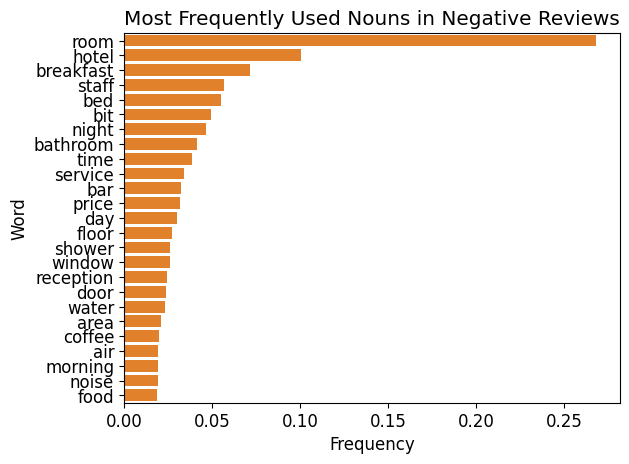

In [99]:
df_negative = df_feature_values.loc[df_feature_values['Review Type'] == 'Negative', :].sort_values(by=['Frequency'], ascending=False)

sns.barplot(data=df_negative.head(25), x='Frequency', y='Word', color='#ff7f0e')

plt.title('Most Frequently Used Nouns in Negative Reviews')

plt.show()

In [100]:
df_negative.head(25)

,Word,Review Type,Frequency,Value
755,room,Negative,0.268173,-0.705042
735,hotel,Negative,0.100365,-0.389240
671,breakfast,Negative,0.071765,-0.221672
757,staff,Negative,0.056876,-0.743350
753,bed,Negative,0.055214,-0.623883
53,bit,Negative,0.049563,0.199151
662,night,Negative,0.046490,-0.204539
736,bathroom,Negative,0.041433,-0.391756
469,time,Negative,0.038824,-0.043937
717,service,Negative,0.034190,-0.317450


In [101]:
df.loc[df['positive_review'].str.contains('superb', na=False), 'positive_review'].sample(1).iloc[0]

' As a first time guest I was warmly welcomed and found the staff engaging and helpful The location was superb and the old world ambience made one feel at home My very comfortable suite made me feel like staying longer The buffet breakfast was in a lovely room with an impressive array of choices'

### Factor Analysis in Recommendation System

In [102]:
import pandas as pd

df = pd.read_csv('hotel_reviews_preprocessed.csv')
df.loc[df['positive_review_lem'].isna(), 'positive_review_lem'] = ''
df.loc[df['negative_review_lem'].isna(), 'negative_review_lem'] = ''

df

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,positive_review_lem,negative_review_lem
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,park hotel,post site trip one mistake place booking com n...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,NaN,0,1403,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,complaint hotel location surrounding room amen...,
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,staff hotel breakfast range,room bit room story step level room tea coffee...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,location surrounding bar restaurant area build...,room floor week furniture picture door dog sho...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,location setting,company line picture room room staff suite adv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99263,20 Pembridge Gardens Kensington and Chelsea Lo...,43,3/6/2016,7.8,The Abbey Court Notting Hill,United Kingdom,Doors very noisy when shutting due to heavine...,34,322,Breakfast was Fresh With A Nice Mix Of Foods ...,12.0,9.0,8.3,"[' Leisure trip ', ' Couple ', ' Double Room '...",515 day,51.510140,-0.196895,mix,door heaviness telephone style handpiece head ...
99264,20 Pembridge Gardens Kensington and Chelsea Lo...,43,12/9/2015,7.8,The Abbey Court Notting Hill,United Kingdom,Holding the shower in the bath,7,322,Room abit dated but nice enough Bathroom smal...,30.0,1.0,7.5,"[' Leisure trip ', ' Couple ', ' Double Room '...",603 day,51.510140,-0.196895,abit shower bath staff location shop tube,shower bath
99265,20 Pembridge Gardens Kensington and Chelsea Lo...,43,12/8/2015,7.8,The Abbey Court Notting Hill,United Kingdom,NaN,0,322,The location near the tube the friendly and h...,29.0,12.0,9.2,"[' Leisure trip ', ' Couple ', ' Double Room '...",604 day,51.510140,-0.196895,location tube staff room break,
99266,20 Pembridge Gardens Kensington and Chelsea Lo...,43,11/7/2015,7.8,The Abbey Court Notting Hill,United Kingdom,3 flights of stairs but that s unavoidable on...,20,322,Very civilised decor and the bathroom was ver...,21.0,1.0,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",635 day,51.510140,-0.196895,decor bathroom breakfast room breakfast,flight stair side bit exercise


In [103]:
from sklearn.feature_extraction.text import CountVectorizer

positive_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

positive_words = positive_vectorizer.fit_transform(df['positive_review_lem'])

positive_words

<99268x373 sparse matrix of type '<class 'numpy.int64'>'
	with 306830 stored elements in Compressed Sparse Row format>

In [104]:
from nltk.corpus import words

english_words = set(words.words())

valid_word = [True if word in english_words else False for word in positive_vectorizer.get_feature_names_out()]

sum(valid_word)

348

In [105]:
positive_words = positive_words[:, valid_word]

positive_words

<99268x348 sparse matrix of type '<class 'numpy.int64'>'
	with 298507 stored elements in Compressed Sparse Row format>

In [106]:
positive_words_labels = positive_vectorizer.get_feature_names_out()[valid_word]

positive_words_labels

array(['access', 'accommodation', 'addition', 'afternoon', 'air',
       'airport', 'ambience', 'amenity', 'anniversary', 'architecture',
       'area', 'arena', 'arrival', 'atmosphere', 'attention', 'attitude',
       'attraction', 'bag', 'balcony', 'bar', 'base', 'bath', 'bathroom',
       'bed', 'bedroom', 'beer', 'birthday', 'biscuit', 'bit', 'block',
       'board', 'bonus', 'book', 'booking', 'bottle', 'brand', 'break',
       'breakfast', 'buffet', 'building', 'bus', 'business', 'cake',
       'car', 'card', 'care', 'case', 'ceiling', 'center', 'chain',
       'champagne', 'change', 'character', 'charge', 'charm', 'check',
       'child', 'chocolate', 'choice', 'city', 'class', 'cleaning',
       'cleanliness', 'club', 'cocktail', 'coffee', 'comfort',
       'complaint', 'concert', 'concierge', 'condition', 'connection',
       'control', 'convenience', 'cor', 'corner', 'cost', 'couple',
       'course', 'courtyard', 'curtain', 'customer', 'daughter', 'day',
       'deal', 'deco

In [107]:
X_positive = pd.DataFrame(positive_words.toarray(), columns=positive_words_labels)

X_positive

,access,accommodation,addition,afternoon,air,airport,ambience,amenity,anniversary,architecture,...,week,weekend,welcome,welcoming,wife,window,wine,work,world,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
negative_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

negative_words = negative_vectorizer.fit_transform(df['negative_review_lem'])

negative_words

<99268x438 sparse matrix of type '<class 'numpy.int64'>'
	with 262983 stored elements in Compressed Sparse Row format>

In [109]:
valid_word = [True if word in english_words else False for word in negative_vectorizer.get_feature_names_out()]

sum(valid_word)

411

In [110]:
negative_words = negative_words[:, valid_word]

negative_words

<99268x411 sparse matrix of type '<class 'numpy.int64'>'
	with 252030 stored elements in Compressed Sparse Row format>

In [111]:
negative_words_labels = negative_vectorizer.get_feature_names_out()[valid_word]

negative_words_labels

array(['access', 'accommodation', 'account', 'addition', 'adult',
       'advance', 'afternoon', 'age', 'air', 'airport', 'alarm',
       'amenity', 'answer', 'apology', 'area', 'arrival', 'atmosphere',
       'attention', 'attitude', 'attraction', 'baby', 'bacon', 'bag',
       'balcony', 'bank', 'bar', 'basement', 'basin', 'bath', 'bathroom',
       'bathtub', 'bed', 'bedroom', 'bedside', 'beer', 'birthday',
       'biscuit', 'bit', 'blind', 'board', 'body', 'book', 'booking',
       'bottle', 'box', 'bread', 'breakfast', 'buffet', 'building', 'bus',
       'business', 'car', 'card', 'care', 'carpet', 'case', 'cash',
       'ceiling', 'center', 'chair', 'change', 'channel', 'charge',
       'check', 'cheese', 'child', 'choice', 'cigarette', 'city',
       'cleaner', 'cleaning', 'cleanliness', 'client', 'closet', 'clothe',
       'club', 'cocktail', 'coffee', 'comfort', 'comment',
       'communication', 'company', 'compensation', 'complaint',
       'concierge', 'condition', 'conditi

In [112]:
X_negative = pd.DataFrame(negative_words.toarray(), columns=negative_words_labels)

X_negative

,access,accommodation,account,addition,adult,advance,afternoon,age,air,airport,...,weather,week,weekend,wife,window,wine,woman,work,world,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df_X = X_positive.subtract(X_negative, fill_value=0).astype('int8')

df_X

,access,accommodation,account,addition,adult,advance,afternoon,age,air,airport,...,weekend,welcome,welcoming,wife,window,wine,woman,work,world,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,-1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
service_words = [
    'attitude',
    'manager',
    'management',
    'receptionist',
    'personnel'
]

service = df_X.loc[:, service_words].sum(1)

service

0        0
1        0
2        0
3       -1
4        0
        ..
99263    0
99264    0
99265    0
99266    0
99267    0
Length: 99268, dtype: int64

In [115]:
cleanliness_words = [
    'cleanliness',
    'smell',
    'dust',
    'refurbishment',
    'condition'
]

cleanliness = df_X.loc[:, cleanliness_words].sum(1)

cleanliness

0       -1
1        0
2        0
3        0
4        0
        ..
99263    0
99264    0
99265    0
99266    0
99267    0
Length: 99268, dtype: int64

In [116]:
value_words = [
    'money',
    'refund',
    'star',
    'value',
    'upgrade',
    'extra'
]

value = df_X.loc[:, value_words].sum(1)

value

0        0
1        0
2        0
3        0
4        0
        ..
99263    0
99264    0
99265    0
99266    0
99267    0
Length: 99268, dtype: int64

In [117]:
comfort_words = [
    'furniture',
    'room',
    'carpet',
    'bed',
    'sheet',
    'home',
    'interior',
    'comfort',
    'suite'
]

comfort = df_X.loc[:, comfort_words].sum(1)

comfort

0       -1
1        1
2       -1
3       -3
4       -2
        ..
99263    0
99264    0
99265    1
99266    1
99267    0
Length: 99268, dtype: int64

In [118]:
environment_words = [
    'picture',
    'renovation',
    'photo',
    'stuff',
    'atmosphere',
    'arena',
    'hotel',
    'environment'
]

environment = df_X.loc[:, environment_words].sum(1)

environment

0        0
1        1
2        1
3       -2
4       -2
        ..
99263    0
99264    0
99265    0
99266    0
99267    0
Length: 99268, dtype: int64

In [119]:
df['Service'] = service
df['Cleanliness'] = cleanliness
df['Comfort'] = comfort
df['Environment'] = environment
df['Value'] = value

df

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,days_since_review,lat,lng,positive_review_lem,negative_review_lem,Service,Cleanliness,Comfort,Environment,Value
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,0 days,52.360576,4.915968,park hotel,post site trip one mistake place booking com n...,0,-1,-1,0,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,NaN,0,1403,No real complaints the hotel was great great ...,...,0 days,52.360576,4.915968,complaint hotel location surrounding room amen...,,0,0,1,1,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,3 days,52.360576,4.915968,staff hotel breakfast range,room bit room story step level room tea coffee...,0,0,-1,1,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,3 days,52.360576,4.915968,location surrounding bar restaurant area build...,room floor week furniture picture door dog sho...,-1,0,-3,-2,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,10 days,52.360576,4.915968,location setting,company line picture room room staff suite adv...,0,0,-2,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99263,20 Pembridge Gardens Kensington and Chelsea Lo...,43,3/6/2016,7.8,The Abbey Court Notting Hill,United Kingdom,Doors very noisy when shutting due to heavine...,34,322,Breakfast was Fresh With A Nice Mix Of Foods ...,...,515 day,51.510140,-0.196895,mix,door heaviness telephone style handpiece head ...,0,0,0,0,0
99264,20 Pembridge Gardens Kensington and Chelsea Lo...,43,12/9/2015,7.8,The Abbey Court Notting Hill,United Kingdom,Holding the shower in the bath,7,322,Room abit dated but nice enough Bathroom smal...,...,603 day,51.510140,-0.196895,abit shower bath staff location shop tube,shower bath,0,0,0,0,0
99265,20 Pembridge Gardens Kensington and Chelsea Lo...,43,12/8/2015,7.8,The Abbey Court Notting Hill,United Kingdom,NaN,0,322,The location near the tube the friendly and h...,...,604 day,51.510140,-0.196895,location tube staff room break,,0,0,1,0,0
99266,20 Pembridge Gardens Kensington and Chelsea Lo...,43,11/7/2015,7.8,The Abbey Court Notting Hill,United Kingdom,3 flights of stairs but that s unavoidable on...,20,322,Very civilised decor and the bathroom was ver...,...,635 day,51.510140,-0.196895,decor bathroom breakfast room breakfast,flight stair side bit exercise,0,0,1,0,0


In [120]:
df_grouped = df.groupby(
    ['hotel_name', 'hotel_address']
)[['average_score', 'Service', 'Cleanliness', 'Comfort', 'Environment', 'Value']].mean().reset_index()

df_grouped.columns = ['Hotel Name', 'Hotel Address', 'Average Score', 'Service', 'Cleanliness', 'Comfort', 'Environment', 'Value']

df_grouped.sort_values(['Average Score'], ascending=False, ignore_index=True, inplace=True)

df_grouped

,Hotel Name,Hotel Address,Average Score,Service,Cleanliness,Comfort,Environment,Value
0,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,9.8,0.071429,0.000000,0.178571,0.214286,-0.035714
1,Haymarket Hotel,1 Suffolk Place Westminster Borough London SW1...,9.6,0.008264,0.033058,0.256198,0.256198,0.049587
2,Charlotte Street Hotel,15 17 Charlotte Street Hotel Westminster Borou...,9.5,0.007092,0.014184,0.361702,0.283688,0.035461
3,Milestone Hotel Kensington,1 Kensington Court Kensington and Chelsea Lond...,9.5,0.000000,0.000000,0.244186,0.302326,0.058140
4,Hotel The Peninsula Paris,19 avenue Kleber 16th arr 75116 Paris France,9.5,0.000000,0.034483,0.206897,0.206897,-0.034483
...,...,...,...,...,...,...,...,...
275,Kube Hotel Ice Bar,1 5 Passage Ruelle 18th arr 75018 Paris France,7.2,-0.105263,-0.052632,0.052632,0.052632,0.052632
276,Britannia International Hotel Canary Wharf,163 Marsh Wall Docklands Tower Hamlets London ...,7.1,-0.025475,-0.031948,-0.206724,-0.060347,0.026310
277,Holiday Inn Paris Montparnasse Pasteur,10 rue Gager Gabillot 15th arr 75015 Paris France,7.1,-0.054054,-0.081081,-0.216216,-0.108108,-0.108108
278,Park Lane Mews Hotel,2 Stanhope Row Park Lane Westminster Borough L...,7.0,-0.013245,-0.047304,-0.352886,-0.063387,-0.009461


In [121]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

ss = StandardScaler()
sn = Normalizer()
mms = MinMaxScaler(feature_range=(0, 10))

df_grouped[['Service', 'Cleanliness', 'Comfort', 'Environment', 'Value']] = mms.fit_transform(sn.fit_transform(ss.fit_transform(
    df_grouped[['Service', 'Cleanliness', 'Comfort', 'Environment', 'Value']]
))).round(1)

df_grouped

,Hotel Name,Hotel Address,Average Score,Service,Cleanliness,Comfort,Environment,Value
0,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,9.8,10.0,5.6,5.5,6.1,3.9
1,Haymarket Hotel,1 Suffolk Place Westminster Borough London SW1...,9.6,5.9,9.2,6.5,7.4,6.9
2,Charlotte Street Hotel,15 17 Charlotte Street Hotel Westminster Borou...,9.5,5.8,7.5,7.9,8.2,6.5
3,Milestone Hotel Kensington,1 Kensington Court Kensington and Chelsea Lond...,9.5,5.0,5.9,6.7,8.9,7.8
4,Hotel The Peninsula Paris,19 avenue Kleber 16th arr 75116 Paris France,9.5,5.0,9.8,6.1,6.8,3.2
...,...,...,...,...,...,...,...,...
275,Kube Hotel Ice Bar,1 5 Passage Ruelle 18th arr 75018 Paris France,7.2,0.2,3.0,4.8,4.6,5.9
276,Britannia International Hotel Canary Wharf,163 Marsh Wall Docklands Tower Hamlets London ...,7.1,2.5,2.7,2.2,2.4,5.9
277,Holiday Inn Paris Montparnasse Pasteur,10 rue Gager Gabillot 15th arr 75015 Paris France,7.1,2.4,1.6,3.6,3.3,2.9
278,Park Lane Mews Hotel,2 Stanhope Row Park Lane Westminster Borough L...,7.0,3.9,1.9,1.6,2.8,4.6


In [122]:
df_grouped.head(25)

,Hotel Name,Hotel Address,Average Score,Service,Cleanliness,Comfort,Environment,Value
0,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,9.8,10.0,5.6,5.5,6.1,3.9
1,Haymarket Hotel,1 Suffolk Place Westminster Borough London SW1...,9.6,5.9,9.2,6.5,7.4,6.9
2,Charlotte Street Hotel,15 17 Charlotte Street Hotel Westminster Borou...,9.5,5.8,7.5,7.9,8.2,6.5
3,Milestone Hotel Kensington,1 Kensington Court Kensington and Chelsea Lond...,9.5,5.0,5.9,6.7,8.9,7.8
4,Hotel The Peninsula Paris,19 avenue Kleber 16th arr 75116 Paris France,9.5,5.0,9.8,6.1,6.8,3.2
5,Le Narcisse Blanc Spa,19 Boulevard De La Tour Maubourg 7th arr 75007...,9.5,5.0,8.1,8.0,7.0,7.5
6,Lansbury Heritage Hotel,117 Poplar High Street Tower Hamlets London E1...,9.4,5.0,6.6,6.0,9.4,7.0
7,Splendide Royal Paris,18 Rue du Cirque 8th arr 75008 Paris France,9.4,8.3,5.5,8.0,7.2,3.6
8,Nolinski Paris,16 Avenue de l Opera 1st arr 75001 Paris France,9.4,6.8,8.2,5.0,8.0,2.5
9,Intercontinental London The O2,1 Waterview Drive Greenwich London SE10 0TW Un...,9.4,3.8,6.6,9.1,7.6,4.6


In [123]:
df_count = df.groupby(
    ['hotel_name', 'hotel_address']
)['reviewer_score'].count().reset_index()

df_count.columns = ['Hotel Name', 'Hotel Address', 'Number of Reviews']

df_count

,Hotel Name,Hotel Address,Number of Reviews
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,159
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,148
2,Ace Hotel London Shoreditch,100 Shoreditch High Street Hackney London E1 6...,514
3,Amarante Champs Elys es,19 Rue Vernet 8th arr 75008 Paris France,102
4,Ambassadors Bloomsbury,12 Upper Woburn Place Camden London WC1H 0HX U...,768
...,...,...,...
275,W London Leicester Square,10 Wardour Street Leicester Square Westminster...,267
276,Waldorf Madeleine,12 boulevard Malesherbes 8th arr 75008 Paris F...,281
277,Windermere Hotel,142 To 144 Warwick Way Victoria Westminster Bo...,95
278,Windsor Opera,10 Rue Gabriel Laumain 10th arr 75010 Paris Fr...,34


In [124]:
df_grouped = pd.merge(
    df_grouped, df_count,
    how='left',
    on=['Hotel Name', 'Hotel Address']
)

df_grouped

,Hotel Name,Hotel Address,Average Score,Service,Cleanliness,Comfort,Environment,Value,Number of Reviews
0,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,9.8,10.0,5.6,5.5,6.1,3.9,28
1,Haymarket Hotel,1 Suffolk Place Westminster Borough London SW1...,9.6,5.9,9.2,6.5,7.4,6.9,121
2,Charlotte Street Hotel,15 17 Charlotte Street Hotel Westminster Borou...,9.5,5.8,7.5,7.9,8.2,6.5,141
3,Milestone Hotel Kensington,1 Kensington Court Kensington and Chelsea Lond...,9.5,5.0,5.9,6.7,8.9,7.8,86
4,Hotel The Peninsula Paris,19 avenue Kleber 16th arr 75116 Paris France,9.5,5.0,9.8,6.1,6.8,3.2,58
...,...,...,...,...,...,...,...,...,...
275,Kube Hotel Ice Bar,1 5 Passage Ruelle 18th arr 75018 Paris France,7.2,0.2,3.0,4.8,4.6,5.9,19
276,Britannia International Hotel Canary Wharf,163 Marsh Wall Docklands Tower Hamlets London ...,7.1,2.5,2.7,2.2,2.4,5.9,4789
277,Holiday Inn Paris Montparnasse Pasteur,10 rue Gager Gabillot 15th arr 75015 Paris France,7.1,2.4,1.6,3.6,3.3,2.9,37
278,Park Lane Mews Hotel,2 Stanhope Row Park Lane Westminster Borough L...,7.0,3.9,1.9,1.6,2.8,4.6,1057


In [125]:
df_grouped.insert(2, 'Number of Reviews', df_grouped.pop('Number of Reviews'))

df_grouped

,Hotel Name,Hotel Address,Number of Reviews,Average Score,Service,Cleanliness,Comfort,Environment,Value
0,Ritz Paris,15 Place Vend me 1st arr 75001 Paris France,28,9.8,10.0,5.6,5.5,6.1,3.9
1,Haymarket Hotel,1 Suffolk Place Westminster Borough London SW1...,121,9.6,5.9,9.2,6.5,7.4,6.9
2,Charlotte Street Hotel,15 17 Charlotte Street Hotel Westminster Borou...,141,9.5,5.8,7.5,7.9,8.2,6.5
3,Milestone Hotel Kensington,1 Kensington Court Kensington and Chelsea Lond...,86,9.5,5.0,5.9,6.7,8.9,7.8
4,Hotel The Peninsula Paris,19 avenue Kleber 16th arr 75116 Paris France,58,9.5,5.0,9.8,6.1,6.8,3.2
...,...,...,...,...,...,...,...,...,...
275,Kube Hotel Ice Bar,1 5 Passage Ruelle 18th arr 75018 Paris France,19,7.2,0.2,3.0,4.8,4.6,5.9
276,Britannia International Hotel Canary Wharf,163 Marsh Wall Docklands Tower Hamlets London ...,4789,7.1,2.5,2.7,2.2,2.4,5.9
277,Holiday Inn Paris Montparnasse Pasteur,10 rue Gager Gabillot 15th arr 75015 Paris France,37,7.1,2.4,1.6,3.6,3.3,2.9
278,Park Lane Mews Hotel,2 Stanhope Row Park Lane Westminster Borough L...,1057,7.0,3.9,1.9,1.6,2.8,4.6


In [126]:
df_grouped.to_csv('supplementary_hotel_scores.csv')

'Done'

'Done'

### Word Clouds Factors for Recommendation System

In [127]:
import pandas as pd

df = pd.read_csv('hotel_reviews_preprocessed.csv')
df.loc[df['positive_review_lem'].isna(), 'positive_review_lem'] = ''
df.loc[df['negative_review_lem'].isna(), 'negative_review_lem'] = ''

df

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,positive_review_lem,negative_review_lem
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,park hotel,post site trip one mistake place booking com n...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,NaN,0,1403,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,complaint hotel location surrounding room amen...,
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,staff hotel breakfast range,room bit room story step level room tea coffee...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,location surrounding bar restaurant area build...,room floor week furniture picture door dog sho...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,location setting,company line picture room room staff suite adv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99263,20 Pembridge Gardens Kensington and Chelsea Lo...,43,3/6/2016,7.8,The Abbey Court Notting Hill,United Kingdom,Doors very noisy when shutting due to heavine...,34,322,Breakfast was Fresh With A Nice Mix Of Foods ...,12.0,9.0,8.3,"[' Leisure trip ', ' Couple ', ' Double Room '...",515 day,51.510140,-0.196895,mix,door heaviness telephone style handpiece head ...
99264,20 Pembridge Gardens Kensington and Chelsea Lo...,43,12/9/2015,7.8,The Abbey Court Notting Hill,United Kingdom,Holding the shower in the bath,7,322,Room abit dated but nice enough Bathroom smal...,30.0,1.0,7.5,"[' Leisure trip ', ' Couple ', ' Double Room '...",603 day,51.510140,-0.196895,abit shower bath staff location shop tube,shower bath
99265,20 Pembridge Gardens Kensington and Chelsea Lo...,43,12/8/2015,7.8,The Abbey Court Notting Hill,United Kingdom,NaN,0,322,The location near the tube the friendly and h...,29.0,12.0,9.2,"[' Leisure trip ', ' Couple ', ' Double Room '...",604 day,51.510140,-0.196895,location tube staff room break,
99266,20 Pembridge Gardens Kensington and Chelsea Lo...,43,11/7/2015,7.8,The Abbey Court Notting Hill,United Kingdom,3 flights of stairs but that s unavoidable on...,20,322,Very civilised decor and the bathroom was ver...,21.0,1.0,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",635 day,51.510140,-0.196895,decor bathroom breakfast room breakfast,flight stair side bit exercise


In [128]:
from sklearn.feature_extraction.text import CountVectorizer

positive_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

positive_words = positive_vectorizer.fit_transform(df['positive_review_lem'])

positive_words

<99268x373 sparse matrix of type '<class 'numpy.int64'>'
	with 306830 stored elements in Compressed Sparse Row format>

In [129]:
from nltk.corpus import words

english_words = set(words.words())

valid_word = [True if word in english_words else False for word in positive_vectorizer.get_feature_names_out()]

sum(valid_word)

348

In [130]:
positive_words = positive_words[:, valid_word]

positive_words

<99268x348 sparse matrix of type '<class 'numpy.int64'>'
	with 298507 stored elements in Compressed Sparse Row format>

In [131]:
positive_words_labels = positive_vectorizer.get_feature_names_out()[valid_word]

positive_words_labels

array(['access', 'accommodation', 'addition', 'afternoon', 'air',
       'airport', 'ambience', 'amenity', 'anniversary', 'architecture',
       'area', 'arena', 'arrival', 'atmosphere', 'attention', 'attitude',
       'attraction', 'bag', 'balcony', 'bar', 'base', 'bath', 'bathroom',
       'bed', 'bedroom', 'beer', 'birthday', 'biscuit', 'bit', 'block',
       'board', 'bonus', 'book', 'booking', 'bottle', 'brand', 'break',
       'breakfast', 'buffet', 'building', 'bus', 'business', 'cake',
       'car', 'card', 'care', 'case', 'ceiling', 'center', 'chain',
       'champagne', 'change', 'character', 'charge', 'charm', 'check',
       'child', 'chocolate', 'choice', 'city', 'class', 'cleaning',
       'cleanliness', 'club', 'cocktail', 'coffee', 'comfort',
       'complaint', 'concert', 'concierge', 'condition', 'connection',
       'control', 'convenience', 'cor', 'corner', 'cost', 'couple',
       'course', 'courtyard', 'curtain', 'customer', 'daughter', 'day',
       'deal', 'deco

In [132]:
negative_vectorizer = CountVectorizer(stop_words='english', min_df=0.001, binary=True)

negative_words = negative_vectorizer.fit_transform(df['negative_review_lem'])

negative_words

<99268x438 sparse matrix of type '<class 'numpy.int64'>'
	with 262983 stored elements in Compressed Sparse Row format>

In [133]:
valid_word = [True if word in english_words else False for word in negative_vectorizer.get_feature_names_out()]

sum(valid_word)

411

In [134]:
negative_words = negative_words[:, valid_word]

negative_words

<99268x411 sparse matrix of type '<class 'numpy.int64'>'
	with 252030 stored elements in Compressed Sparse Row format>

In [135]:
negative_words_labels = negative_vectorizer.get_feature_names_out()[valid_word]

negative_words_labels

array(['access', 'accommodation', 'account', 'addition', 'adult',
       'advance', 'afternoon', 'age', 'air', 'airport', 'alarm',
       'amenity', 'answer', 'apology', 'area', 'arrival', 'atmosphere',
       'attention', 'attitude', 'attraction', 'baby', 'bacon', 'bag',
       'balcony', 'bank', 'bar', 'basement', 'basin', 'bath', 'bathroom',
       'bathtub', 'bed', 'bedroom', 'bedside', 'beer', 'birthday',
       'biscuit', 'bit', 'blind', 'board', 'body', 'book', 'booking',
       'bottle', 'box', 'bread', 'breakfast', 'buffet', 'building', 'bus',
       'business', 'car', 'card', 'care', 'carpet', 'case', 'cash',
       'ceiling', 'center', 'chair', 'change', 'channel', 'charge',
       'check', 'cheese', 'child', 'choice', 'cigarette', 'city',
       'cleaner', 'cleaning', 'cleanliness', 'client', 'closet', 'clothe',
       'club', 'cocktail', 'coffee', 'comfort', 'comment',
       'communication', 'company', 'compensation', 'complaint',
       'concierge', 'condition', 'conditi

In [136]:
df_positive = df.groupby(['hotel_name', 'hotel_address'])['positive_review_lem'].apply(' '.join).reset_index()

df_positive.columns = ['Hotel Name', 'Hotel Address', 'Positive Review Nouns']

df_positive

,Hotel Name,Hotel Address,Positive Review Nouns
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,welcome hotel location size room bathroom frie...
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,location 3e arrondissement room bed staff clea...
2,Ace Hotel London Shoreditch,100 Shoreditch High Street Hackney London E1 6...,bed location security staff door hotel party h...
3,Amarante Champs Elys es,19 Rue Vernet 8th arr 75008 Paris France,location room concierge trouble staff receptio...
4,Ambassadors Bloomsbury,12 Upper Woburn Place Camden London WC1H 0HX U...,room back room view breakfast plenty choice co...
...,...,...,...
275,W London Leicester Square,10 Wardour Street Leicester Square Westminster...,location staff superb manager problem solution...
276,Waldorf Madeleine,12 boulevard Malesherbes 8th arr 75008 Paris F...,location staff view room room standard staff ...
277,Windermere Hotel,142 To 144 Warwick Way Victoria Westminster Bo...,variety food start day boutique hotel woman lu...
278,Windsor Opera,10 Rue Gabriel Laumain 10th arr 75010 Paris Fr...,people versaille luggage care staff day night ...


In [137]:
df_negative = df.groupby(['hotel_name', 'hotel_address'])['negative_review_lem'].apply(' '.join).reset_index()

df_negative.columns = ['Hotel Name', 'Hotel Address', 'Negative Review Nouns']

df_negative

,Hotel Name,Hotel Address,Negative Review Nouns
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,prise drink bar problem building charm propert...
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,conditioning room work wall area need refurbis...
2,Ace Hotel London Shoreditch,100 Shoreditch High Street Hackney London E1 6...,price tag water room coffee cement hollandaise...
3,Amarante Champs Elys es,19 Rue Vernet 8th arr 75008 Paris France,room couple issue bulb toilet roll holder wall...
4,Ambassadors Bloomsbury,12 Upper Woburn Place Camden London WC1H 0HX U...,douvet blanket request room street floor room ...
...,...,...,...
275,W London Leicester Square,10 Wardour Street Leicester Square Westminster...,renovation bar lounge area bar area refurbishm...
276,Waldorf Madeleine,12 boulevard Malesherbes 8th arr 75008 Paris F...,time night bed floor noise car mass spray one ...
277,Windermere Hotel,142 To 144 Warwick Way Victoria Westminster Bo...,room d cor attention shower bath disability h...
278,Windsor Opera,10 Rue Gabriel Laumain 10th arr 75010 Paris Fr...,room tea signage isolation time corridor neig...


In [138]:
df_nouns = pd.DataFrame({
    'Hotel Name': df_positive['Hotel Name'],
    'Hotel Address': df_positive['Hotel Address'],
    'Positive Nouns': df_positive['Positive Review Nouns'],
    'Negative Nouns': df_negative['Negative Review Nouns']
})

df_nouns

,Hotel Name,Hotel Address,Positive Nouns,Negative Nouns
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,welcome hotel location size room bathroom frie...,prise drink bar problem building charm propert...
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,location 3e arrondissement room bed staff clea...,conditioning room work wall area need refurbis...
2,Ace Hotel London Shoreditch,100 Shoreditch High Street Hackney London E1 6...,bed location security staff door hotel party h...,price tag water room coffee cement hollandaise...
3,Amarante Champs Elys es,19 Rue Vernet 8th arr 75008 Paris France,location room concierge trouble staff receptio...,room couple issue bulb toilet roll holder wall...
4,Ambassadors Bloomsbury,12 Upper Woburn Place Camden London WC1H 0HX U...,room back room view breakfast plenty choice co...,douvet blanket request room street floor room ...
...,...,...,...,...
275,W London Leicester Square,10 Wardour Street Leicester Square Westminster...,location staff superb manager problem solution...,renovation bar lounge area bar area refurbishm...
276,Waldorf Madeleine,12 boulevard Malesherbes 8th arr 75008 Paris F...,location staff view room room standard staff ...,time night bed floor noise car mass spray one ...
277,Windermere Hotel,142 To 144 Warwick Way Victoria Westminster Bo...,variety food start day boutique hotel woman lu...,room d cor attention shower bath disability h...
278,Windsor Opera,10 Rue Gabriel Laumain 10th arr 75010 Paris Fr...,people versaille luggage care staff day night ...,room tea signage isolation time corridor neig...


In [139]:
nouns = set(positive_words_labels).union(set(negative_words_labels))

nouns

{'access',
 'accommodation',
 'account',
 'addition',
 'adult',
 'advance',
 'afternoon',
 'age',
 'air',
 'airport',
 'alarm',
 'ambience',
 'amenity',
 'anniversary',
 'answer',
 'apology',
 'architecture',
 'area',
 'arena',
 'arrival',
 'atmosphere',
 'attention',
 'attitude',
 'attraction',
 'baby',
 'bacon',
 'bag',
 'balcony',
 'bank',
 'bar',
 'base',
 'basement',
 'basin',
 'bath',
 'bathroom',
 'bathtub',
 'bed',
 'bedroom',
 'bedside',
 'beer',
 'birthday',
 'biscuit',
 'bit',
 'blind',
 'block',
 'board',
 'body',
 'bonus',
 'book',
 'booking',
 'bottle',
 'box',
 'brand',
 'bread',
 'break',
 'breakfast',
 'buffet',
 'building',
 'bus',
 'business',
 'cake',
 'car',
 'card',
 'care',
 'carpet',
 'case',
 'cash',
 'ceiling',
 'center',
 'chain',
 'chair',
 'champagne',
 'change',
 'channel',
 'character',
 'charge',
 'charm',
 'check',
 'cheese',
 'child',
 'chocolate',
 'choice',
 'cigarette',
 'city',
 'class',
 'cleaner',
 'cleaning',
 'cleanliness',
 'client',
 'closet'

In [140]:
df_nouns['Positive Nouns'] = [' '.join([w for w in r.split(' ') if w in nouns]) for r in df_nouns['Positive Nouns']]

df_nouns['Negative Nouns'] = [' '.join([w for w in r.split(' ') if w in nouns]) for r in df_nouns['Negative Nouns']]

df_nouns

,Hotel Name,Hotel Address,Positive Nouns,Negative Nouns
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,welcome hotel location size room bathroom frie...,drink bar problem building charm property staf...
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,location room bed staff cleanliness hotel brea...,room work wall area need refurbishment star ho...
2,Ace Hotel London Shoreditch,100 Shoreditch High Street Hackney London E1 6...,bed location security staff door hotel party h...,price water room coffee egg lot style hotel ch...
3,Amarante Champs Elys es,19 Rue Vernet 8th arr 75008 Paris France,location room concierge trouble staff receptio...,room couple issue toilet roll wall need attent...
4,Ambassadors Bloomsbury,12 Upper Woburn Place Camden London WC1H 0HX U...,room room view breakfast plenty choice coffee ...,request room street floor room floor street st...
...,...,...,...,...
275,W London Leicester Square,10 Wardour Street Leicester Square Westminster...,location staff superb manager problem thank be...,renovation bar lounge area bar area refurbishm...
276,Waldorf Madeleine,12 boulevard Malesherbes 8th arr 75008 Paris F...,location staff view room room standard staff a...,time night bed floor noise car bathroom shower...
277,Windermere Hotel,142 To 144 Warwick Way Victoria Westminster Bo...,variety food start day hotel woman luggage roo...,room cor attention shower bath hotel area half...
278,Windsor Opera,10 Rue Gabriel Laumain 10th arr 75010 Paris Fr...,people luggage care staff day night desk man s...,room tea time corridor idea room night window ...


In [141]:
df_nouns.to_csv('hotel_name_and_address_with_review_factors.csv', index=False)

'Done'

'Done'

In [142]:
# Importing needed libraries
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from ast import literal_eval #module that converts a string of lists to a normal listdf = pd.read_csv('Hotel_reviews.csv')
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")

In [143]:
data = pd.read_csv("Hotel_Reviews.csv")
df = pd.DataFrame(data)
df.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


In [144]:
# Replacing 'united kingdom' with 'UK' for easy use
df.Hotel_Address = df['Hotel_Address'].str.replace('United Kingdom','UK')
# Splitting the hotel address and picking out the last string which would be the countries
df['countries'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])
df.countries.unique() # All the hotels are located in six(6) countries

array(['Netherlands', 'UK', 'France', 'Spain', 'Italy', 'Austria'],
      dtype=object)

In [146]:
# Dropping unneeded columns
df.drop(columns = ['Additional_Number_of_Scoring',
       'Review_Date','Reviewer_Nationality', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng'],inplace=True)

df.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Tags,countries
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",Netherlands


In [147]:
df['review'] = df['Negative_Review']+df['Positive_Review']

In [148]:
# df.drop(['Positive_Review','Negative_Review'],1,inplace=True)

In [149]:
df

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Tags,countries,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands,No Negative No real complaints the hotel was g...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",Netherlands,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",Netherlands,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",Netherlands,You When I booked with your company on line y...
...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,no trolly or staff to help you take the lugga...,location,"[' Leisure trip ', ' Family with older childre...",Austria,no trolly or staff to help you take the lugga...
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,The hotel looks like 3 but surely not 4,Breakfast was ok and we got earlier check in,"[' Leisure trip ', ' Family with young childre...",Austria,The hotel looks like 3 but surely not 4 Brea...
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,The ac was useless It was a hot week in vienn...,No Positive,"[' Leisure trip ', ' Family with older childre...",Austria,The ac was useless It was a hot week in vienn...
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,No Negative,The rooms are enormous and really comfortable...,"[' Leisure trip ', ' Group ', ' Standard Tripl...",Austria,No Negative The rooms are enormous and really ...


In [150]:
#module that converts a string of lists to a normal list
from ast import literal_eval
#function to convert array of tags to string
def impute(col):
  col = col[0]
  if (type(col) != list):
    return "".join(literal_eval(col))
  else:
    return col#using the function
df['Tags']  = df[['Tags']].apply(impute,axis=1)
df.head()

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Tags,countries,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,Leisure trip Couple Duplex Double Room Sta...,Netherlands,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,No Negative,No real complaints the hotel was great great ...,Leisure trip Couple Duplex Double Room Sta...,Netherlands,No Negative No real complaints the hotel was g...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,Leisure trip Family with young children Dup...,Netherlands,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,Leisure trip Solo traveler Duplex Double Ro...,Netherlands,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,Leisure trip Couple Suite Stayed 2 nights ...,Netherlands,You When I booked with your company on line y...


In [151]:
# df['Tags_token'] = df['Tags'].apply(lambda x: " ".join([token.text for token in nlp(x) if token.is_alpha]))
text_for_wordcloud = " ".join(df['Positive_Review'][:5].values)

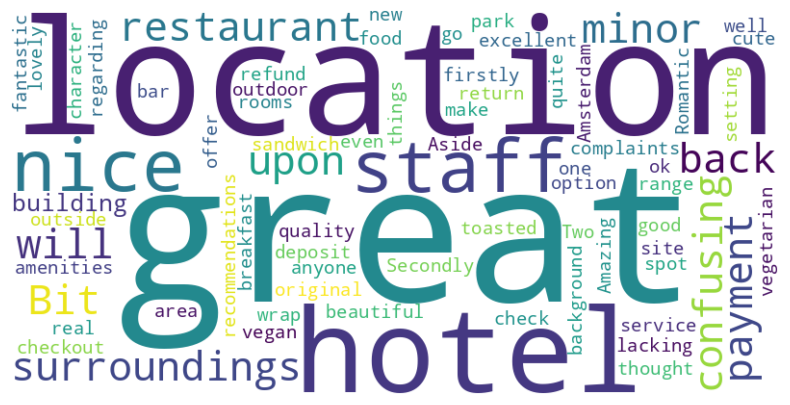

In [152]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_for_wordcloud)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [153]:
# Sam's data

df_supplementary = pd.read_csv('./supplementary_hotel_scores.csv').drop(columns=['Unnamed: 0'])
df_nouns = pd.read_csv('./hotel_name_and_address_with_review_factors.csv')
df_nouns.drop_duplicates(subset='Hotel Name',keep='first',inplace=True)

df_nouns

,Hotel Name,Hotel Address,Positive Nouns,Negative Nouns
0,11 Cadogan Gardens,11 Cadogan Gardens Sloane Square Kensington an...,welcome hotel location size room bathroom frie...,drink bar problem building charm property staf...
1,1K Hotel,13 Boulevard Du Temple 3rd arr 75003 Paris France,location room bed staff cleanliness hotel brea...,room work wall area need refurbishment star ho...
2,Ace Hotel London Shoreditch,100 Shoreditch High Street Hackney London E1 6...,bed location security staff door hotel party h...,price water room coffee egg lot style hotel ch...
3,Amarante Champs Elys es,19 Rue Vernet 8th arr 75008 Paris France,location room concierge trouble staff receptio...,room couple issue toilet roll wall need attent...
4,Ambassadors Bloomsbury,12 Upper Woburn Place Camden London WC1H 0HX U...,room room view breakfast plenty choice coffee ...,request room street floor room floor street st...
...,...,...,...,...
275,W London Leicester Square,10 Wardour Street Leicester Square Westminster...,location staff superb manager problem thank be...,renovation bar lounge area bar area refurbishm...
276,Waldorf Madeleine,12 boulevard Malesherbes 8th arr 75008 Paris F...,location staff view room room standard staff a...,time night bed floor noise car bathroom shower...
277,Windermere Hotel,142 To 144 Warwick Way Victoria Westminster Bo...,variety food start day hotel woman luggage roo...,room cor attention shower bath hotel area half...
278,Windsor Opera,10 Rue Gabriel Laumain 10th arr 75010 Paris Fr...,people luggage care staff day night desk man s...,room tea time corridor idea room night window ...


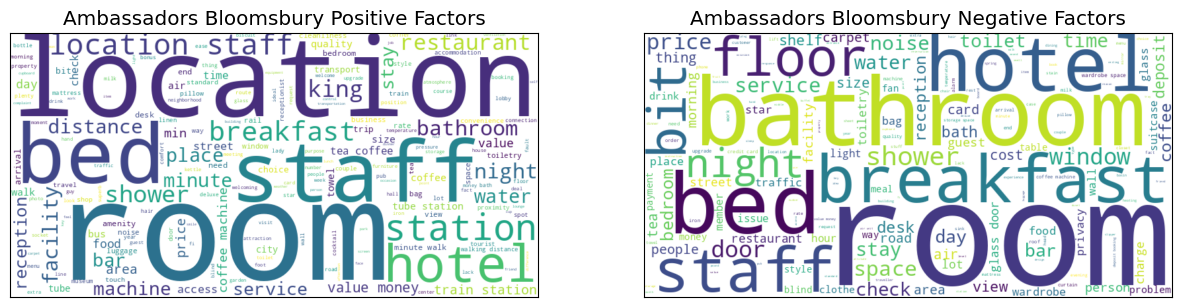

In [207]:
def get_wordclouds(hotel_name):
    positive_nouns = df_nouns.loc[df_nouns['Hotel Name'] == hotel_name, 'Positive Nouns'].iloc[0]
    negative_nouns = df_nouns.loc[df_nouns['Hotel Name'] == hotel_name, 'Negative Nouns'].iloc[0]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.title(f'{hotel_name} Positive Factors')
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_nouns)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.title(f'{hotel_name} Negative Factors')
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_nouns)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.xticks([])
    plt.yticks([])

    plt.show()

get_wordclouds('Ambassadors Bloomsbury')

In [211]:
def destination_and_description(location,description, display_amount=5):
    # Making these columns lowercase
    df['countries']=df['countries'].str.lower()
    df['Tags']=df['Tags'].str.lower()

    # Dividing the texts into small tokens (sentences into words)
    description = description.lower()
    description_tokens=word_tokenize(description)

    sw = stopwords.words('english') # List of predefined english  stopwords to be used for computing
    lemm = WordNetLemmatizer() # We now define the functions below connecting these imported packages
    filtered_sen = {w for w in description_tokens if not w in sw}
    f_set=set()
    for fs in filtered_sen:
        f_set.add(lemm.lemmatize(fs))


    # Defining a new variable that takes in the location inputted and bring out the features defined below
    country_feat = df[df['countries']==location.lower()]
    country_feat = country_feat.set_index(np.arange(country_feat.shape[0]))
    l1 =[];l2 =[];cos=[];
    for i in range(country_feat.shape[0]):
        temp_tokens=word_tokenize(country_feat['Tags'][i])
        temp1_set={w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)


        cos.append(len(rvector))
    country_feat['similarity']=cos
    country_feat=country_feat.sort_values(by='similarity',ascending=False)
    country_feat.drop_duplicates(subset='Hotel_Name',keep='first',inplace=True)
    country_feat.sort_values('Average_Score',ascending=False,inplace=True)
    country_feat.reset_index(inplace=True)

    country_feat = pd.merge(
        country_feat[['Hotel_Name', 'Average_Score', 'countries']], df_supplementary,
        how='left',
        left_on=['Hotel_Name'],
        right_on=['Hotel Name']
    )

    country_feat = country_feat[[
        'Hotel Name', 'Hotel Address', 'countries', 'Number of Reviews', 'Average Score',
        'Service', 'Cleanliness', 'Comfort', 'Environment', 'Value'
    ]]

    country_feat.columns = country_feat.columns.str.title()

    country_feat.rename(columns={'Countries': 'Country'}, inplace=True)
    country_feat['Country'] = country_feat['Country'].str.title()
    country_feat.loc[country_feat['Country'] == 'Uk', 'Country'] = 'UK'


    display(country_feat.head(display_amount))

    get_wordclouds(country_feat['Hotel Name'].iloc[0])

,Hotel_Address,Average_Score,Hotel_Name,Negative_Review,Positive_Review,Tags,countries,review
268055,Althanstra e 5 09 Alsergrund 1090 Vienna Austria,8.1,Hotel Bellevue Wien,The one lift s door did not close properly on...,The room was very neat and clean and the brea...,leisure trip couple standard double room s...,austria,The one lift s door did not close properly on...
268056,Althanstra e 5 09 Alsergrund 1090 Vienna Austria,8.1,Hotel Bellevue Wien,We wanted an accomodation with car parking op...,Clean room perfect location Breakfast was ok ...,leisure trip couple executive double room ...,austria,We wanted an accomodation with car parking op...
268057,Althanstra e 5 09 Alsergrund 1090 Vienna Austria,8.1,Hotel Bellevue Wien,We didn t find many suitable places to eat in...,I liked the attitude of the staff and the roo...,leisure trip couple executive double room ...,austria,We didn t find many suitable places to eat in...
268058,Althanstra e 5 09 Alsergrund 1090 Vienna Austria,8.1,Hotel Bellevue Wien,A bit old furnishing but it s not a problem t...,Very good breakfast fresh bread good coffee C...,leisure trip couple standard double room s...,austria,A bit old furnishing but it s not a problem t...
268059,Althanstra e 5 09 Alsergrund 1090 Vienna Austria,8.1,Hotel Bellevue Wien,We were at this hotel three years ago and it ...,No Positive,business trip couple standard double room ...,austria,We were at this hotel three years ago and it ...


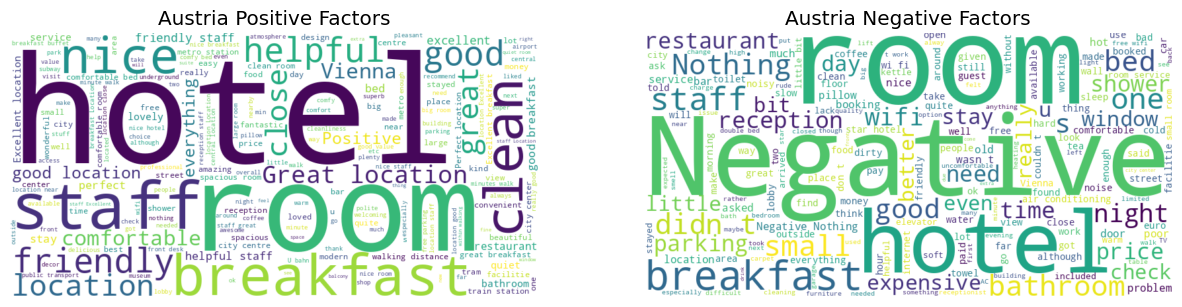

In [231]:
def destination_and_description(country, description):
    # Filter the DataFrame for the specified country
    country_df = df[df['countries'].str.contains(country, case=False, na=False)]

    # Check if there are any entries for the specified country
    if country_df.empty:
        print(f"No data found for hotels in {country}")
        return

    # I am just displaying the first 5 rows
    display(country_df.head())

    # Generate word clouds
    positive_factors_text = ' '.join(country_df['Positive_Review'].dropna())  # Replace 'Positive Reviews' with the actual column name
    negative_factors_text = ' '.join(country_df['Negative_Review'].dropna())  # Replace 'Negative Reviews' with the actual column name

    # Create the word clouds for positive and negative factors
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.title(f'{country} Positive Factors')
    positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_factors_text)
    plt.imshow(positive_wordcloud, interpolation="bilinear")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'{country} Negative Factors')
    negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_factors_text)
    plt.imshow(negative_wordcloud, interpolation="bilinear")
    plt.axis('off')

    plt.show()

destination_and_description('Austria', 'I am going on a Business trip, I need a Deluxe room and i am staying for five nights')


# **DONE**